グラフ理論
===
## グラフの表現方法

複数の要素とそれらの関係性を表現する方法として、**グラフ**(**ネットワーク**)がある


### グラフの基礎

グラフは**頂点**(vertex)と **辺**(edge)から構成される。

頂点は**節点** ( **ノード** , node)、辺は**孤**(arc)、**リンク** (link)、**枝** (branch)などと呼ばれることもある

ある2つの頂点が1つの辺でつながる時、これらの頂点は**隣接**(adjacent)しているという。
ある辺の両端の頂点は**端点**(endpoint)tお言う。
ある頂点に関して、その頂点と隣接する頂点がいくつかあるか、つまり何本の辺が出ているかは、**次数**(degree)と呼ばれる。

ある2つの頂点を結び辺の集合を**道**(path)という。
すべての頂点の間に道があるグラフを**連結グラフ**(connected graph)と言う。

すべての頂点がペアになっていて、それらを結び道がただ1つしかないグラフが**木**(tree)である。
木には**閉路**(cycle)がない
また、いくつかの木で構成されえるグラフを**森**(forest)という。

辺に向きがあるグラフを**有向グラフ**(directed graph)、辺に向きがないグラフを**無向グラフ**(undirected graph)という。

### グラフを表現するデータ構造
代表的なデータ構造としては、**隣接行列**(adjacency matrix)と**隣接リスト**(adjacency list)がある。

隣接行列は、正方行列で、サイズはグラフの含まれる頂点の数となる。
行列のi行とj列の要素は、頂点iとjの間に辺があれば1、それ以外なら0となる。

無向グラフの場合、自分自身のつながる辺を考えないため、隣接行列の対角成分はすべて0となる。(対称行列)

隣接リスト(adjacency list)は、それぞれの頂点からみて、隣接する頂点を連結リストなどで保持するデータ構造である。

隣接行列はグラフの頂点数 $n$ に対して、必ず $n \times n$ の行列を用意する必要がある。
つまり、隣接リストの方が頂点管理の無駄がない。
しかし、表現は隣接行列の方がわかりやすいため隣接行列がおすすめ。






In [1]:
import networkx as nx
graph = nx.Graph()
graph.add_edge(5,6)
graph.add_edge(6,7)

In [2]:
%matplotlib inline
nx.draw_networkx(graph)



ModuleNotFoundError: No module named 'matplotlib'

## グラフ探索のアルゴリズム
配列の様にデータが一方向に並んでいる場合は、すべての要素を漏れなく処理したいとき、先頭から順番に計算を進めれば良いのでわかりやすい。
しかし、グラフはたくさんの枝分かれがあるため、配列の様に単純な方向に処理すれば良いワケではない。


In [3]:

import random

def generate_graph(n, m):
    """n個の頂点とm個の辺を持つグラフを作る"""
    graph_data = [[0] * n for _ in range(n)]
    # 同じ辺が同一視されるようにsetを用意
    edge_set = set()
    while len(edge_set) < m:
        i, j = random.sample(range(n), 2)
        if i > j: i, j = j ,i
        edge_set.add((i,j))
        graph_data[i][j] = graph_data[j][i] = 1
    return graph_data, edge_set


In [4]:
random.seed(6)
node_num = 16
edge_num = 20
my_graph, edge_set = generate_graph(node_num, edge_num)
edge_set

{(0, 2),
 (0, 4),
 (0, 8),
 (1, 9),
 (2, 5),
 (2, 7),
 (2, 13),
 (3, 12),
 (3, 15),
 (5, 11),
 (5, 13),
 (6, 8),
 (6, 11),
 (6, 13),
 (7, 8),
 (7, 11),
 (8, 10),
 (12, 13),
 (12, 15),
 (13, 14)}

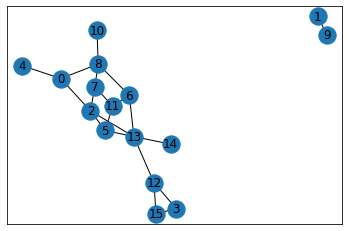

In [5]:

# NetworkXを使ってグラフを描画するコード
graph = nx.Graph()
for u,v in edge_set:
    graph.add_edge(u, v)
%matplotlib inline
nx.draw_networkx(graph)


In [6]:
my_graph


[[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
 [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]]

### 連結グラフを探す
配列の様に一方向ではないため、どの様に探索するかアルゴリズムが必要。
**幅優先探索**(breadth first search)と**深さ優先探索**(depth first search)

#### キュー

**FIFO** (First-In First-Out)
Pythonリストを用いることで実現可能であるが、先頭の要素を取り除く処理に$\mathcal{O}(n)$の時間がかかる
そのため、標準モジュールを使う。

In [108]:
from collections import deque

queue = deque([])
queue.append(1)
queue.append(2)
queue.append(3)
print(queue)

print(queue.popleft())
print(queue)

deque([1, 2, 3])
1
deque([2, 3])


#### グラフの幅優先探索
```
Input:スタートの頂点(v)、グラフを表現する隣接行列
Output:頂点vから到達できるすべての頂点
Procedure:
1. 作業用のキュー(Q)と到達した頂点を保存するための set (S) を用意し、それぞれにvを追加する
2. キューから頂点を取り出す
3. 取り出した頂点の隣にある全ての頂点に対して以下の処理を行う
   Sに入っていなければ、QとSの両方へ追加する
4. Qが空ならSを出力して終了、そうでなければ、手続き2へ移動
```


In [109]:
def breadth_first_search(start, W):
    """
    隣接行列Wで表現されるグラフについて、
    start から到達できるnodeの一覧を返す
    """

    # リストをキューにする
    work_queue = deque([])
    visited = set()
    # 初期化
    work_queue.append(start)
    visited.add(start)
    while work_queue:
        here = work_queue.popleft()
        for i, node in enumerate(W[here]):
            if node == 0: continue
            if i not in visited:
                work_queue.append(i)
                visited.add(i)
    return visited

In [110]:
breadth_first_search(1, my_graph)

{1, 9}

In [111]:
breadth_first_search(10, my_graph)

{0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15}

#### 深さ優先探索とスタック
基本的には同じアルゴリズムであるが、調べるべき頂点をキューではなく、**スタック**のデータ構造に保存する。
スタックの動作は、最後に入ったデータが次に処理される対象になる**LIFO**(Last-IN,First-Out)。

Pythonのリストにappendメソッドでデータを追加、popメソッドで末尾から取り出されるため、リストをそのままスタックとして利用できる。





In [112]:
def depth_first_search(start, W):
    work_stack = []
    visited = set()
    work_stack.append(start)
    visited.add(start)
    while work_stack:
        here = work_stack.pop()
        for i, node in enumerate(W[here]):
            if node == 0: continue
            if i not in visited:
                work_stack.append(i)
                visited.add(i)
    return visited

In [113]:
depth_first_search(10, my_graph)

{0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15}

## 最短距離を求める

### ダイクストラ法

辺の重みが負でない場合、**ダイクストラ法**(Dijkstra's algorithm)と言う方法で最短距離を求めることができる。

ダイクストラ法は、ある頂点sから到達できる他のすべての頂点への最短距離を計算する。
まず、sを除く残りすべての頂点への仮の最短距離を無限大に初期化する。
s自身への距離は0。
緩和はsから順番に行い、アルゴリズムが頂点vに達した自転で、その頂点に割り当てられていた仮の最短距離が、sからvの正式な最短距離となる。

ダイクストラアルゴリズムのポイントは、次に操作する頂点を、仮の最短距離の小さい物から優先して決めていく。
この保存にヒープデータ構造を用いる。



In [114]:
import math
import heapq

def dijkstra(start, W):
    """スタートの頂点と隣接行列を受け取り、到達できるすべての頂点への最短距離を返す"""
    # 仮の最短処理を無限大に設定
    distance_list = [math.inf] * len(W)
    distance_list[start] = 0
    # 最短距離が確定した頂点
    done_list = []
    # 次に処理する頂点を決めるためのヒープ
    wait_heap = []
    for i, d in enumerate(distance_list):
        # (スタートからの距離、頂点)というタプルを作る
        heapq.heappush(wait_heap, (d, i))
    while wait_heap:
        p = heapq.heappop(wait_heap)
        i = p[1]
        if i in done_list:
            continue
        done_list.append(i)
        for j, x in enumerate(W[i]):
            if x == 1 and j not in done_list:
                d = min(distance_list[j], distance_list[i]+x)
                distance_list[j] = d
                heapq.heappush(wait_heap, (d, j))
    return distance_list

In [115]:
dijkstra(10, my_graph)

[2, inf, 3, 5, 3, 4, 2, 2, 1, inf, 0, 3, 4, 3, 4, 5]

### ダイクストラ法の計算量は？
頂点数:n
辺の数:m
1回のヒープの操作にかかる計算量は$\mathcal{O}(\log n)$
全体の見積もりは$\mathcal{O}((n+m) \log n $となる
これはかなり幅のある見積もりで、辺の数と頂点の数が同じくらいなら$\mathcal{O}(n \log n)$となり、もっとも密なグラフを考えると$\mathcal{O}(n^2 \log n)$となる



### すべての頂点間の最短距離
すべての頂点からの最短距離が欲しい時は？

-> すべての頂点からダイクストラ法を実行する
しかし、計算量は、$\mathcal{O}(n(n+m) \log n)$となる。
グラフが密である場合は$\mathcal{O}(n^3 \log n)$になる。

**Floyd-Warshall法**のアルゴリズムでは、$O(n^3)$で、すべての頂点間の最短距離を計算できる。
辺の数には依存しない。

つまり、辺の密度が低い時は、拡張点からダイクストラ法で、密度が高い時はFloyd-Warshall法のアルゴリズムがよい。

### 動的計画法
全体が最適化されていると、ある一部分だけに着目してもその部分が最適化されていると言う事例が多い。
これを**最適性の原理**(principle of optimality)という。

この見方を変えて、最適な全体は局所的に最適化された部分の集合でできていると考えることができる。
この性質を利用してアルゴリズムを設計する方法が動的計画法となる。
個別の最適解を求めていき、まとめると全体の最適解がえらえる。

### Folyd-Warshell法

$n^2$個のすべての頂点ペアについて初期状態を設定する。
ある頂点ペアが隣接している場合、2点間は最短距離になる。
隣接していなければ、点間を無限大に設定。

この状態で、ある1つの頂点xに着目し、隣接していない頂点ペアv,uが、xを介してつながればそれは最短距離となる。
この調子で考慮する頂点を2つ3つと増やしていく。
数学的帰納法を考えるときと同じ要領で、途中は気にせずk-1番目まできたとする。
$d^{k-1}(u,v)$を$k-1$番目までの頂点だけを考慮にいれているときの$u$と$v$の最短距離だとする。
k番目の頂点を考慮したとき、$d^k(u,v)$は、次の式で求めることができる。

$
d^k(u,v) = min\{d^{k-1}(u,v), d^{k-1}(u,k) + d^{k-1}(k,v)\}
$



In [116]:
def all_pairs_shortest_paths(W):
    # 頂点の数
    n = len(W)
    # 結果を格納する行列を用意する
    res = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(i, n):
            if i == j:
                val = 0
            elif W[i][j]:
                val = W[i][j]
            else:
                val = math.inf
            res[i][j] = res[j][i] = val
    # 動的計画法ですべての頂点間の最短距離を求める
    for k in range(n):
        for u in range(n):
            for v in range(n):
                res[u][v] = min(res[u][v], res[u][k] + res[k][v])
    return res


In [117]:
all_pairs_shortest_paths(my_graph)


[[0, inf, 1, 4, 1, 2, 2, 2, 1, inf, 2, 3, 3, 2, 3, 4],
 [inf, 0, inf, inf, inf, inf, inf, inf, inf, 1, inf, inf, inf, inf, inf, inf],
 [1, inf, 0, 3, 2, 1, 2, 1, 2, inf, 3, 2, 2, 1, 2, 3],
 [4, inf, 3, 0, 5, 3, 3, 4, 4, inf, 5, 4, 1, 2, 3, 1],
 [1, inf, 2, 5, 0, 3, 3, 3, 2, inf, 3, 4, 4, 3, 4, 5],
 [2, inf, 1, 3, 3, 0, 2, 2, 3, inf, 4, 1, 2, 1, 2, 3],
 [2, inf, 2, 3, 3, 2, 0, 2, 1, inf, 2, 1, 2, 1, 2, 3],
 [2, inf, 1, 4, 3, 2, 2, 0, 1, inf, 2, 1, 3, 2, 3, 4],
 [1, inf, 2, 4, 2, 3, 1, 1, 0, inf, 1, 2, 3, 2, 3, 4],
 [inf, 1, inf, inf, inf, inf, inf, inf, inf, 0, inf, inf, inf, inf, inf, inf],
 [2, inf, 3, 5, 3, 4, 2, 2, 1, inf, 0, 3, 4, 3, 4, 5],
 [3, inf, 2, 4, 4, 1, 1, 1, 2, inf, 3, 0, 3, 2, 3, 4],
 [3, inf, 2, 1, 4, 2, 2, 3, 3, inf, 4, 3, 0, 1, 2, 1],
 [2, inf, 1, 2, 3, 1, 1, 2, 2, inf, 3, 2, 1, 0, 1, 2],
 [3, inf, 2, 3, 4, 2, 2, 3, 3, inf, 4, 3, 2, 1, 0, 3],
 [4, inf, 3, 1, 5, 3, 3, 4, 4, inf, 5, 4, 1, 2, 3, 0]]